# Esercitazione su Funzioni, Moduli e Classi

## Esercizio 0 - Funzioni e Moduli 

* Creare il file python `somme.py` in cui vanno definite due funzioni:
    * una funzione che restituisca la somma dei primi *n* numeri naturali, con *n* da passare tramite un argomento;
    * una funzione che restituisca la somma delle radici dei primi *n* numeri naturali, con *n* da passare tramite un argomento.
* Creare uno script python che importi il modulo `somme` appena creato  e ne utilizzi le funzioni
* Esaminare la cartella di lavoro

## Esercizio 1 - Moduli e Funzioni con argomenti

* Modificare il file `somme.py` aggiungendo:
    * una funzione che restituisca la somma e il prodotto dei primi *n* numeri naturali, con *n* da passare tramite un argomento;
    * una funzione che restituisca $\sum_{i=0}^n i^{\alpha}$, con *n* da passare tramite un argomento e $\alpha$ da passare come argomento opzionale con valore di default pari a 1.
* Modificare lo script python che importa il modulo `somme` in modo da utilizzare le funzioni appena create.

## Esrecizio 2 - Classi

https://www-sk.icrr.u-tokyo.ac.jp/en/sk/

https://it.wikipedia.org/wiki/Super-Kamiokande


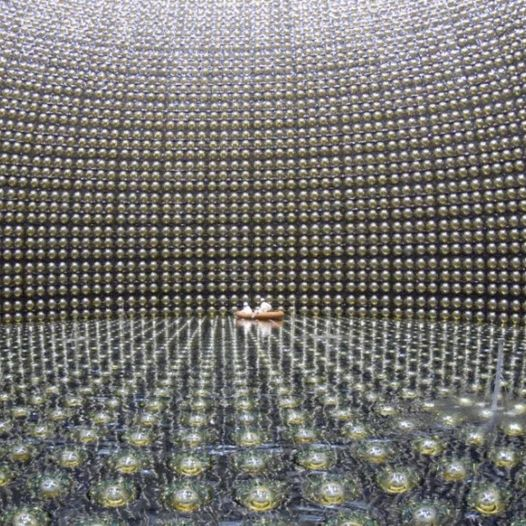

### Accesso ai Dati



Per il terzo esercizio utilizzeremo dei dati in formato _CSV_ che possono essere aperti direttamente o 
scaricati tramite `wget`: 

- https://raw.githubusercontent.com/s-germani/metodi-computazionali-fisica-2025/refs/heads/main/dati/classi/hit_times_M0.csv
- https://raw.githubusercontent.com/s-germani/metodi-computazionali-fisica-2025/refs/heads/main/dati/classi/hit_times_M1.csv
- https://raw.githubusercontent.com/s-germani/metodi-computazionali-fisica-2025/refs/heads/main/dati/classi/hit_times_M2.csv
- https://raw.githubusercontent.com/s-germani/metodi-computazionali-fisica-2025/refs/heads/main/dati/classi/hit_times_M3.csv


### Contenuto File

I file rappresentano i dati relativi a un (fittizio) rivelatore con sensori per fotoni organizzato in 4 moduli, ognuno contenenete 5 sensori.

* Ogni file corrisponde ai dati di un modulo.
* Ogni riga del file contiene l'informazione su un sensore che è stato colpito (*Hit*).
* Per ogni *Hit* viene riportato:
    * identificatore del modulo [0-3];
    * identificatore del sensore [0-4];
    * distanza temporale in _ns_ dall'inizio della presa dati.
* Gli *Hit* sono ordinati temporalmente all'interno di ciascun file.

I dati rappresentano un secondo di acquisizione dati.

### Geometria Rivelatore  

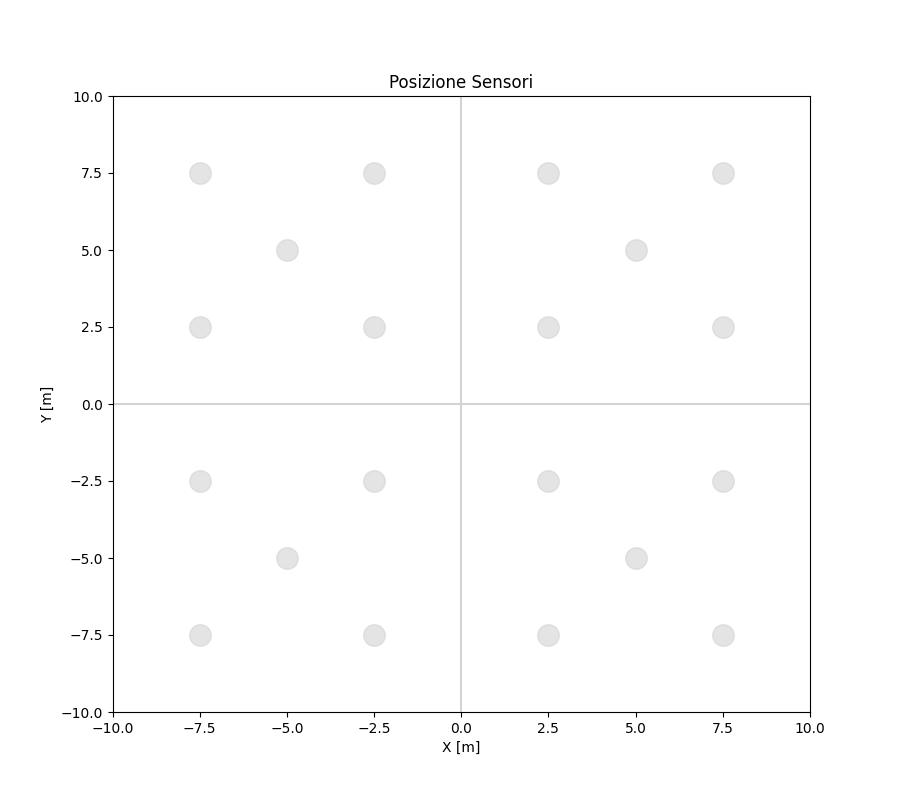

Le posizioni esatte di moduli e sensori sono fornite di seguito:

In [2]:

astr# Coordinate centro Moduli [m]
xmod = [-5,  5, -5,  5]
ymod = [ 5,  5, -5, -5]
        
# Coordinate dei Sensori rispetto al centro del Modulo [m]
xdet = [-2.5, 2.5, 0, -2.5,  2.5]
ydet = [ 2.5, 2.5, 0, -2.5, -2.5]

### Eventi

Si può considerare il rivelatore parte di un esperimento che che sfrutta la luce Cerenkov per studuare _Eventi_ relativi ad un fenomeno di interesse. 

Ad ogni _Evento_ un cono di luce Cerenkov investe i sensori o una parte di essi. I sensori registrano il tempo a cui i fotoni Cerenkov vengono rivelati.

Dal punto di vista del nostro rivelatore, un _Evento_ corrisponde ad un insieme di *Hit* ed alcune informazioni accessorie.

Gli *Hit* apparteneti allo stesso evento saranno presumibilmente raggruppati nel tempo mentre *Hit* apparteneti ad eventi diversi mostreranno una separazione temporale maggiore.

#### Rappresentazione Grafica di un Evento

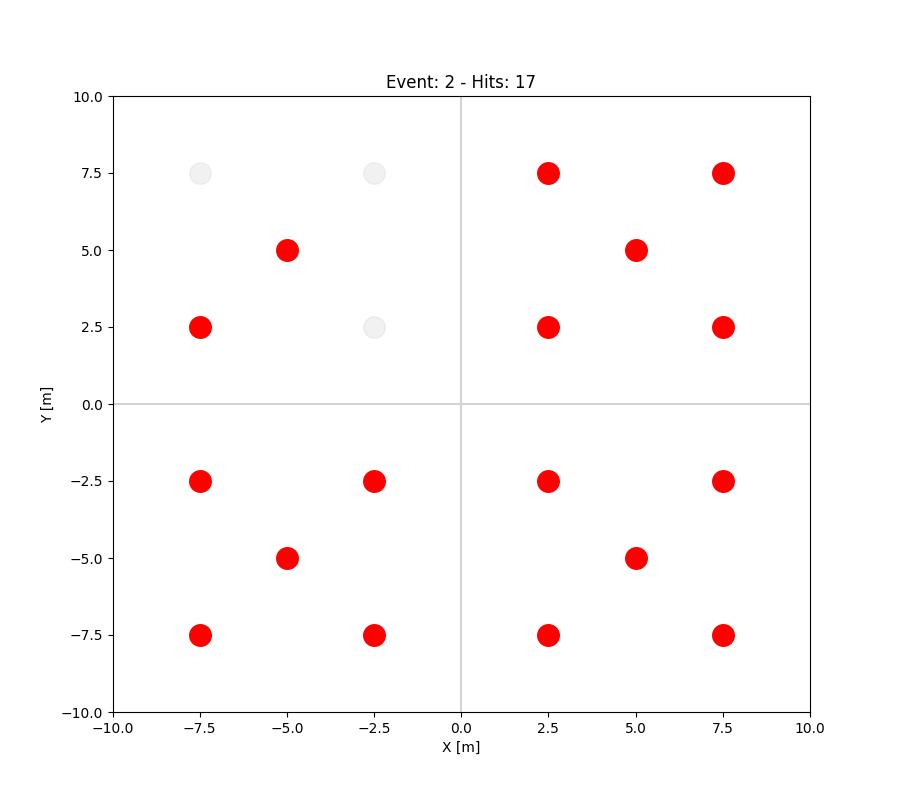

### Prima Parte Esercizio: Hit

* Passo 1:
    * Creare uno script python che esegua le seguenti operazioni:
        1. Legga uno o più file di input;
        2. Produca un istogramma dei tempi per uno dei moduli (file);
        3. Produca un istogramma delle differenze di tempi ($\Delta t$) fra *Hit* consecutivi per uno dei moduli;
            * SUGGERIMENTO: utilizzare funzonalità numpy per il calcolo delle differenze fra gli elementi di un array (`diff`)
            * SUGGERIMENTO: usare il  $\log_{10}(\Delta t)$;
            * Interpretare il grafico risultante.

* Passo 2:
    * Creare il file `reco.py` che definisca la classe *Hit*.
        1. Un oggetto di tipo *Hit* deve contenere informazioni su:
            * Id Modulo;
            * Id Sensore;
            * Time Stamp rivelazione.
        2. Oggetti di tipo *Hit* devono essere ordinabili in base al Time Stamp ed eventualmente in base alla Id del Modulo e del Sensore. 

* Passo 3:
    * Creare uno script python che svolga le seguenti operazioni:
        1. Importi il modulo `reco`;
        2. Legga i file di dati e, per ognuno di essi, produca un array di `reco.Hit`; 
            * SUGGERIMENTO: creare un funzione da richiamare per ogni file;
        3. Produca un array che corrisponda alla combinazione, ordinata temporalmente, di tutti i `reco.Hit`;
            * SUGGERIMENTO: valutare l'utilizzo dell' _overloading_ degli operatori `>` e `<` (`__gt__`, `__lt__`)
            * SUGGERIMANTO: utilizzare funzonalità numpy per ordinare gli elementi di un array (`sort`)
        4. Produca un istogramma dei ($\Delta t$) fra `reco.Hit` consecutivi;
            * SUGGERIMENTO: valutare l'utilizzo dell' _overloading_ degli operatori `+` o `-` (`__add__`, `__sub__`) 
            * Come stabilire la finestra temporale da applicare ai $\Delta t$ che permetta di raggruppare gli *Hit* dello stesso evento ma separi quelii apparteneti ad eventi differenti?
            
* Pensare a come dovrebbe essere strutturata una eventuale classe *Event* per descrivere l'evento fisico come osservato dal rivelatore (quindi basata suglli *Hit*).

### Seconda Parte (OPZIONALE)  Esercizio : Eventi 


* Passo 1:
    * modificare il file `reco.py` in modo che:
        1. Definisca anche la classe *Event*
            * Un oggetto di tipo *Event* deve contenere informazioni su:
                * Numero di Hit 
                * Time Stamp del primo *Hit*
                * Time Stamp dell'ultimo *Hit*
                * Durata temporale
                * Array di tutti gli *Hit*

* Passo 2:
    * Modificare lo script di analisi della Prima Parte aggiungendo funzionalità in modo che:
        1. Crei un array di oggeti di tipo `reco.Event` a partire dall'array ordinato di `reco.Hit` applicando una finestra temorale ai $\Delta t$ tra `reco.Hit` consecutivi
            * SUGGERIMENTO: creare un funzione apposita
        2. Stampi informazioni dettagliate per i primi 10 `reco.Event`
            * SUGGERIMENTO: verificare che le informazioni stampate non contengano indizi di errore
        3. Produca l'istogramma del numero di `reco.Hit` per `reco.Event`
        4. Produca l'istogramma della durata dei `reco.Event`
        5. Produca l'istogramma delle differenze di tempo fra `reco.Event` consecutivi
        6. Produca il grafico 2D del numero di hit nell'evento in funzione della  durata
          * SUGGERIMENTO: usare `plt.scatter`
      
* Passo 3:
    * Estendere lo script precedente producendo la rappresentazione grafica dei primi 10 `reco.Event` (come nell'esempio iniziale)
    * OPZIONALE: includere nella rappresentazione grafica degli eventi anche l'informazione temporale atraverso il colore dei simboli. 
        * Vedi esempio ed informazioni sul codice di seguito.
        * Si nota qualche schema nella distribuzione dei tempi?

#### Rappresentazione Grafica di un Evento con Informazione Temporale

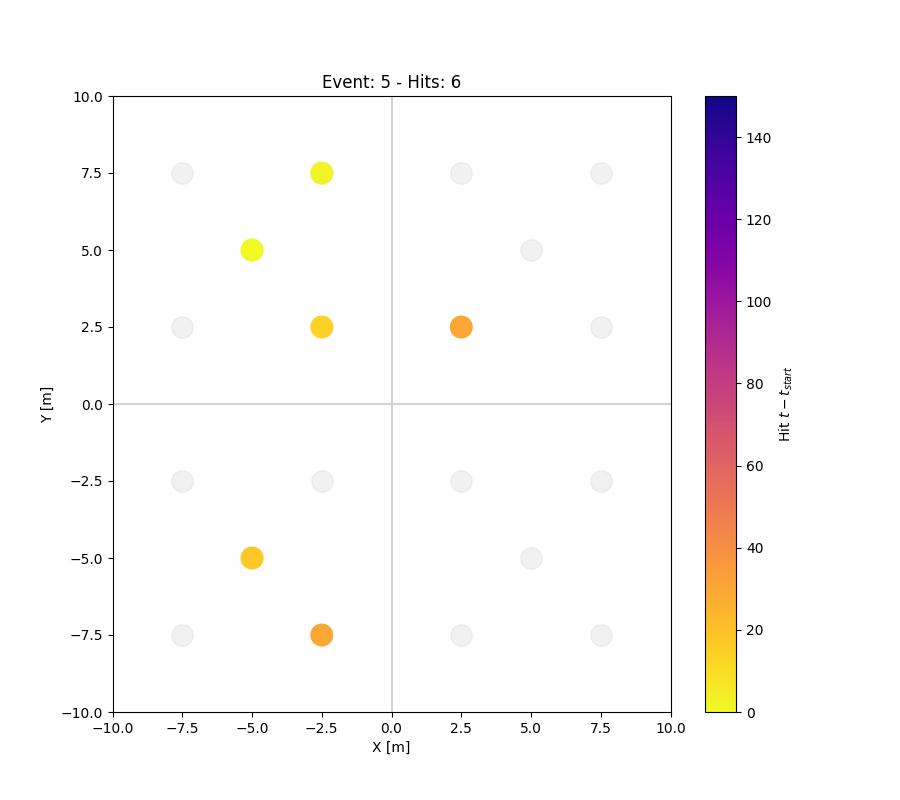

In [ ]:
# Infromazioni per prdurre uno scatter plot con simboli colorati in funzione di una variabile
#  e la corrispondnete barra di colore (Colorbar)
#
# Assumiamo che posizione hit_x, hit_y, hit_time siano array conetenti  posizione x,y e tempi degli Hit

# Definizione area grafico 
img,ax = plt.subplots(figsize=(9,8))
# Scatter plot
# s    --> dimezione simbolo
# c    --> valori rispetto a cui sarà definito il colore del simbolo
# cmap --> tipo di mappa di colore (vedere https://matplotlib.org/stable/tutorials/colors/colormaps.html)
plt.scatter(hit_x, hit_y,      s=240,  c=hit_time, cmap='plasma_r')
# ...
# Colorbar 
plt.colorbar( ax=ax, label='Hit $t-t_{start}$') 
# Limite valori Colorbar
plt.clim(0, 150)
#...


Opzioni colormap: https://matplotlib.org/stable/tutorials/colors/colormaps.html